# Trabajo Práctico 3
Para la imagen suministrada “eyes” (por ninguna razón en especial, con heterocromía), implementar un algoritmo que:
1. Encuentre la posición de los iris en cada par de ojos y mida su distancia en píxeles.
2. Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

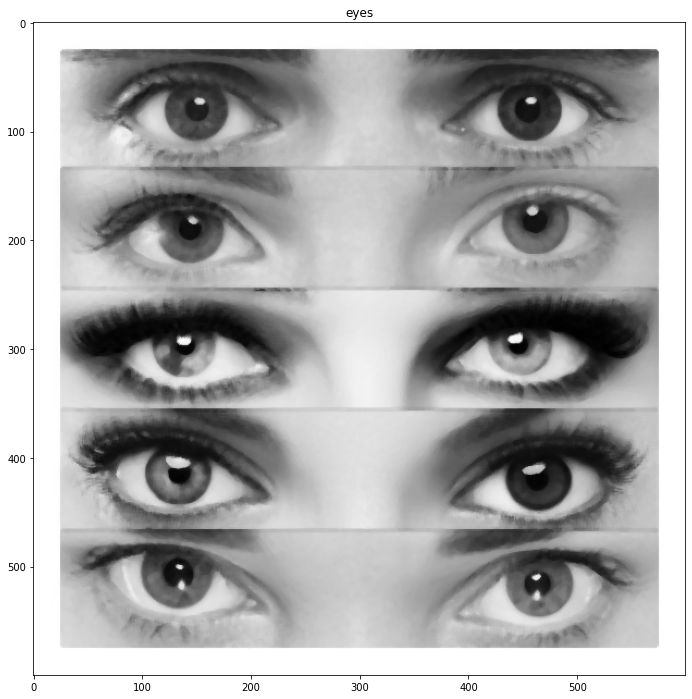

In [3]:
# Leemos la imagen
#=================
img = cv.imread('./img/eyes.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

plt.figure(figsize=(12, 12))
plt.imshow(gray, cmap='gray')
plt.title('eyes')
plt.show()

1. Encontrar iris

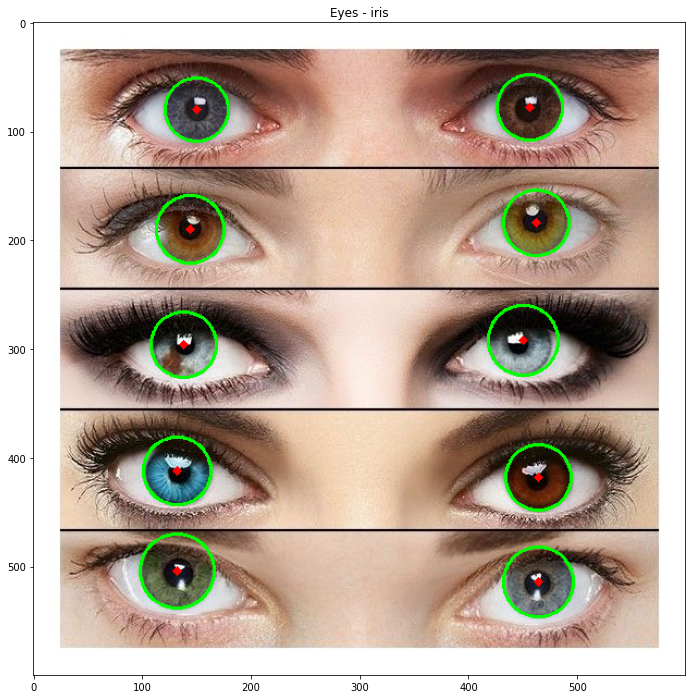

In [4]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()
circles_iris = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=10,param1=90,param2=22,minRadius=25,maxRadius=35)

circles_iris = np.uint16(np.around(circles_iris))
for i in circles_iris[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.title('Eyes - iris')
plt.show()

In [5]:
print("Unordered:\n", circles_iris[0,:])
circles_iris[0,:] = circles_iris[0,:][circles_iris[0,:,1].argsort()]
print("Ordered:\n", circles_iris[0,:])

Unordered:
 [[456  78  30]
 [132 504  34]
 [144 190  31]
 [464 514  32]
 [462 184  30]
 [138 296  30]
 [150  80  29]
 [464 418  30]
 [132 412  31]
 [450 292  32]]
Ordered:
 [[456  78  30]
 [150  80  29]
 [462 184  30]
 [144 190  31]
 [450 292  32]
 [138 296  30]
 [132 412  31]
 [464 418  30]
 [132 504  34]
 [464 514  32]]


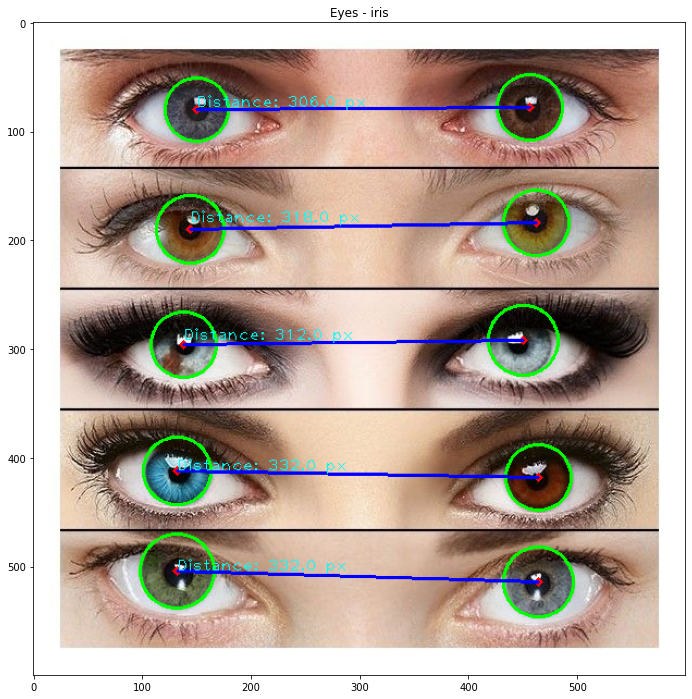

In [6]:
for i in range(0, len(circles_iris[0,:]), 2):
    circle_1 = circles_iris[0,i,:]
    circle_2 = circles_iris[0,i+1,:]

    dist_x = int(circle_2[0])-int(circle_1[0])
    dist_y = int(circle_2[1])-int(circle_1[1])

    distance = np.round((dist_x**2 + dist_y**2)** 0.5)
    
    textPoint_x = min(circle_1[0], circle_2[0])
    textPoint_y = min(circle_1[1], circle_2[1])

    # la línea que une los puntos
    cv.line(img_out,(circle_1[0],circle_1[1]), (circle_2[0],circle_2[1]), (255,0,0), 2)
    cv.putText(img_out, f"Distance: {distance} px", (textPoint_x, textPoint_y), 1, 1, (255,255,0), 1)

plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(img_out, cv.COLOR_BGR2RGB))
plt.title('Eyes - iris')
plt.show()

2. Encontrar pupilas

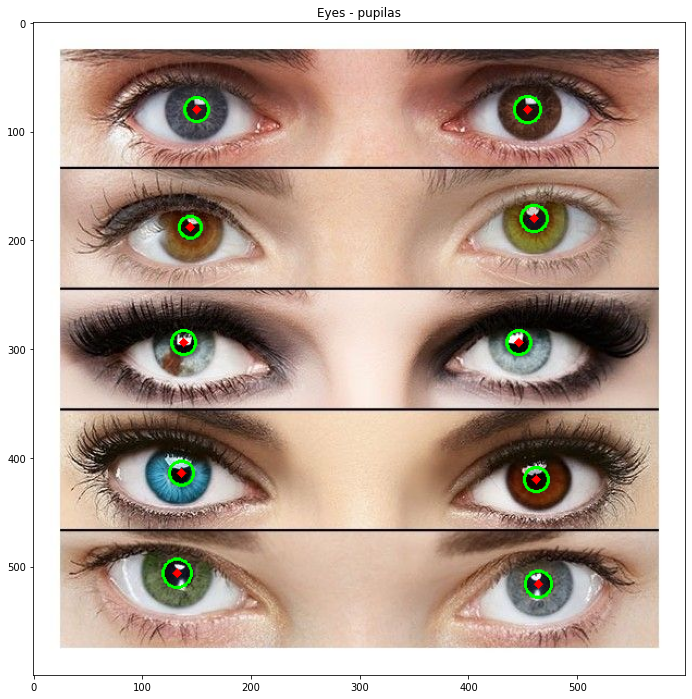

In [7]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out_pup = img.copy()
circles_pupila = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=50,param1=90,param2=16,minRadius=10,maxRadius=15)

circles_pupila = np.uint16(np.around(circles_pupila))
for i in circles_pupila[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out_pup,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out_pup,(i[0],i[1]),2,(0,0,255),3)


plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(img_out_pup, cv.COLOR_BGR2RGB))
plt.title('Eyes - pupilas')
plt.show()

In [8]:
print("Unordered:\n", circles_pupila[0,:])
circles_pupila[0,:] = circles_pupila[0,:][circles_pupila[0,:,1].argsort()]
print("Ordered:\n", circles_pupila[0,:])

Unordered:
 [[132 506  13]
 [454  80  12]
 [464 516  12]
 [462 420  11]
 [150  80  11]
 [460 180  12]
 [144 188  10]
 [138 294  11]
 [136 414  11]
 [446 294  11]]
Ordered:
 [[454  80  12]
 [150  80  11]
 [460 180  12]
 [144 188  10]
 [138 294  11]
 [446 294  11]
 [136 414  11]
 [462 420  11]
 [132 506  13]
 [464 516  12]]


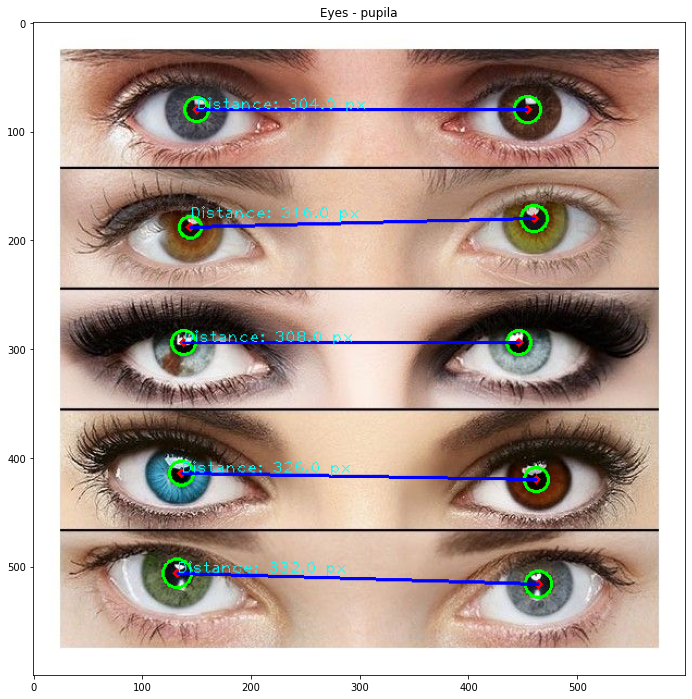

In [9]:
for i in range(0, len(circles_pupila[0,:]), 2):
    circle_1 = circles_pupila[0,i,:]
    circle_2 = circles_pupila[0,i+1,:]

    dist_x = int(circle_2[0])-int(circle_1[0])
    dist_y = int(circle_2[1])-int(circle_1[1])

    distance = np.round((dist_x**2 + dist_y**2)** 0.5)
    
    textPoint_x = min(circle_1[0], circle_2[0])
    textPoint_y = min(circle_1[1], circle_2[1])

    # la línea que une los puntos
    cv.line(img_out_pup,(circle_1[0],circle_1[1]), (circle_2[0],circle_2[1]), (255,0,0), 2)
    cv.putText(img_out_pup, f"Distance: {distance} px", (textPoint_x, textPoint_y), 1, 1, (255,255,0), 1)

plt.figure(figsize=(12, 12))
plt.imshow(cv.cvtColor(img_out_pup, cv.COLOR_BGR2RGB))
plt.title('Eyes - pupila')
plt.show()